In [1]:
import json, pycm, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
oed_cm = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_oed_planet_2023-08-29T08:38:16.865862.json', 'r'))["confusion_matrix"])
iau_2006_08_16_cm = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_iau_2006_08_16_planet_2023-08-29T08:58:57.736448.json', 'r'))["confusion_matrix"])
iau_2006_08_24_cm = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_iau_2006_08_24_planet_2023-08-29T10:34:17.166191.json', 'r'))["confusion_matrix"])

In [3]:
print(pycm.Compare({"OED": oed_cm, "IAU 2006-08-16": iau_2006_08_16_cm, "IAU 2006-08-24": iau_2006_08_24_cm}))

Best : OED

Rank   Name              Class-Score       Overall-Score
1      OED               0.50833           0.92381
2      IAU 2006-08-16    0.4               0.65714
3      IAU 2006-08-24    0.36667           0.5619



In [9]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment[0], 
        "kappa": experiment[1].Kappa,
        "SOA9": experiment[1].SOA9,
        "ACC": experiment[1].Overall_ACC,
        "AUC": experiment[1].AUC['positive'],
        "F1": experiment[1].F1_Macro,
        "FP": experiment[1].FP["positive"],
        "FN": experiment[1].FN["positive"],
        "POP": experiment[1].POP["positive"],
    }
    for experiment in [("OED", oed_cm),("IAU 2006-08-16", iau_2006_08_16_cm), ("IAU 2006-08-24", iau_2006_08_24_cm)] ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "F1", "AUC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,F1,AUC,FP,FN,POP
0,OED,0.82,High,0.91,0.909774,0.91,2,7,100
1,IAU 2006-08-16,0.60,Low,0.80,0.793303,0.80,1,19,100
2,IAU 2006-08-24,0.52,Low,0.76,0.745331,0.76,0,24,100


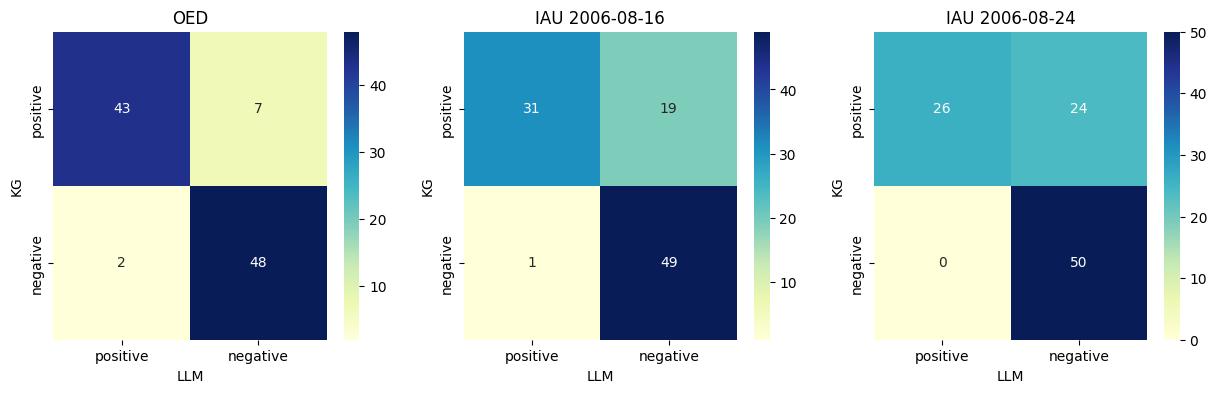

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, cm) in zip(axes, [ ("OED", oed_cm), ("IAU 2006-08-16", iau_2006_08_16_cm), ("IAU 2006-08-24", iau_2006_08_24_cm) ]):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name)
    ax.set(xlabel='LLM', ylabel='KG')
plt.show()

In [5]:
pd.DataFrame({"Krippendorff's Alpha": [ oed_cm.SOA9, iau_2006_08_16_cm.SOA9, iau_2006_08_24_cm.SOA9 ]}, index=[ "OED", "IAU 2006-08-16", "IAU 2006-08-24"])

,Krippendorff's Alpha
OED,High
IAU 2006-08-16,Low
IAU 2006-08-24,Low


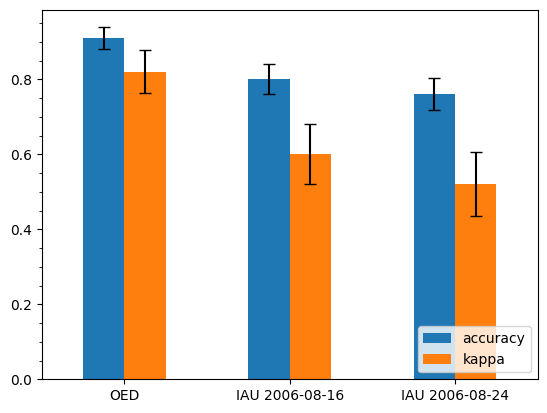

In [6]:
accuracy = [ cm.overall_stat["Overall ACC"] for cm in [ oed_cm, iau_2006_08_16_cm, iau_2006_08_24_cm ] ]
accuracy_se = [ cm.CI("Overall ACC")[0] for cm in [ oed_cm, iau_2006_08_16_cm, iau_2006_08_24_cm ] ]
kappa = [ cm.Kappa for cm in [ oed_cm, iau_2006_08_16_cm, iau_2006_08_24_cm ] ]
kappa_se = [ cm.CI("Kappa")[0] for cm in [ oed_cm, iau_2006_08_16_cm, iau_2006_08_24_cm ] ]
index = [ "OED", "IAU 2006-08-16", "IAU 2006-08-24"]
df = pd.DataFrame({'accuracy': accuracy, 'kappa': kappa}, index=index)
df_se = pd.DataFrame({'accuracy': accuracy_se, 'kappa': kappa_se}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(yerr=df_se, ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()

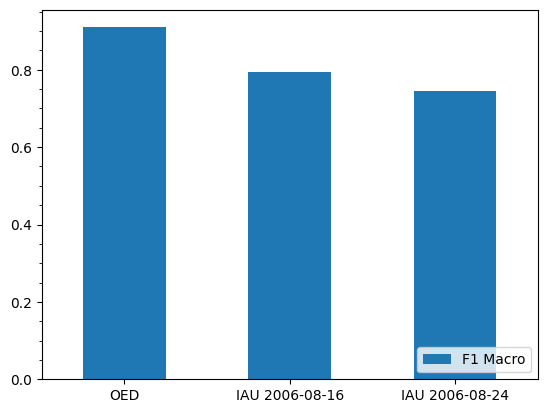

In [7]:
f1_macro = [ cm.F1_Macro for cm in [ oed_cm, iau_2006_08_16_cm, iau_2006_08_24_cm ] ]
index = [ "OED", "IAU 2006-08-16", "IAU 2006-08-24"]
df = pd.DataFrame({'F1 Macro': f1_macro}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()